In [66]:
import quandl
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVR

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [67]:
test_dataframes = {}
train_dataframes = {}
test_Open = {}
quandl.ApiConfig.api_key = 'NKL13i-RzgYty_HQNy7_'
data = ['BCHARTS/KRAKENUSD']
index = 1
for i in range(index):
    train_dataframes[i] = pd.DataFrame(quandl.get(data[i], start_date="2016-05-20'", end_date="2017-12-31"))
for j in range(index):
    test_dataframes[j] = pd.DataFrame(quandl.get(data[j], start_date="'2017-01-01", end_date="2018-05-01"))
test_merged = test_dataframes[0]
test_Open = test_merged['Open']
test_Open.replace(0, np.nan, inplace=True)
test_Open = test_Open.mean(axis=0)
btc_test_dataframes = test_dataframes[0]
btc_test_Closed = btc_test_dataframes['Close']
btc_test_Closed.replace(0, np.nan, inplace=True)
btc_test_Closed = btc_test_Closed.mean(axis=0)
btc_test_dataframes['Avg Close'] = btc_test_Closed
btc_test_dataframes['Avg Open'] = test_Open
btc_test_dataframes.to_csv('out.csv', index=False)
test_merged
training_set = pd.read_csv('out.csv')  # reading csv file
res = []
for i in range(training_set.shape[0]):
    res.append([i + 1])

scale = MinMaxScaler()
y_training = scale.fit_transform(training_set.iloc[:, 0:1])
x1,x2,y1,y2 = train_test_split(res, y_training, train_size=0.9, shuffle=False)
# x_training
# y_training
# training_set
res1 = scale.fit_transform(res)
res = scale.fit_transform(res)
res = res.reshape((-1, 1, 1))
x1 = scale.fit_transform(x1)
x2 = scale.fit_transform(x2)
split = 90/ 100
regr = BaggingRegressor()
regr.fit(x1, y1.ravel())
predicted_price = regr.predict(x2)
#print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
x_test = x1[(x1.size * split).__round__():]
y_test = y1[(y1.size * split).__round__():]
x_train = x1[:(x1.size * split).__round__()]
y_train = y1[:(y1.size * split).__round__()]

Standard deviation 0.2456900055213419
SAD: 637.6097085534002
SSD: 207.96628786204818


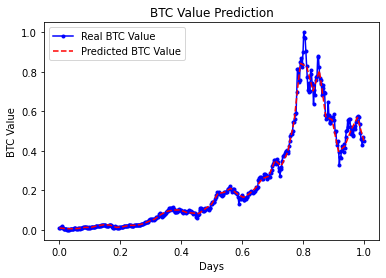

In [68]:
# Result on MatPlot
plt.plot(x2,y2, color='blue', label='Real BTC Value' , marker = '.')
plt.plot(x2,predicted_price, color='red', label='Predicted BTC Value', linestyle ='dashed')
plt.title('BTC Value Prediction')
plt.xlabel('Days')
plt.ylabel('BTC Value')
plt.legend()
difference = (y2 - predicted_price)
print("Standard deviation",np.std(difference))
print("SAD:", np.sum(np.abs(difference)))
print("SSD:", np.sum(np.square(difference)))
plt.show()